## Tuto pour comprendre les autoencoder
lien =  https://www.youtube.com/watch?v=zp8clK9yCro

In [18]:
import torch
import torch.nn as nn 
import torch.optim as optim 
from torchvision import datasets, transforms 
import matplotlib.pyplot as plt

In [19]:
transform = transforms.ToTensor() 
#convertie une image ou un tableau de donnée en un tenseur

In [20]:
mnist_data = datasets.MNIST(root = './data', train = True, download = True, transform = transform)

In [22]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, 
                                          batch_size=64, 
                                          shuffle=True)

In [35]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print('valeur min et max des images :',torch.min(images),torch.max(images))
print('valeur min et max des labels :',torch.min(labels),torch.max(labels))

valeur min et max des images : tensor(0.) tensor(1.)
valeur min et max des labels : tensor(0) tensor(9)


In [44]:
images.shape
print("Nombre d'images :", images.shape[0])
print("Taille de nos images :", images.shape[2]*images.shape[3])

Nombre d'images : 64
Taille de nos images : 784


In [67]:
images.shape[2]

28

In [61]:
class Autoencoder(nn.Module): 
    def __init__(self):
        #beginning size image = 784
        super(Autoencoder, self).__init__() 
        self.encoder = nn.Sequential(
            nn.Linear(images.shape[2]*images.shape[3],128), # 784->128
            nn.ReLU(), 
            nn.Linear(128,64),
            nn.ReLU(), 
            nn.Linear(64,12),
            nn.ReLU(), 
            nn.Linear(12,3)# N -> 3 
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3,12),
            nn.ReLU(), 
            nn.Linear(12,64),
            nn.ReLU(), 
            nn.Linear(64,128),
            nn.ReLU(), 
            nn.Linear(128,images.shape[2]*images.shape[3]),
            ## need a active fonction wich but value between 0 and 1
            nn.Sigmoid()
        )
        pass
    
    def forward (self, x): 
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
# Note : [-1,1]  -> nn.Tanh
        

In [62]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay=1e-5)

In [63]:
num_epochs = 1
outputs    = []
for epoch in range(num_epochs): 
    for (img, _) in data_loader: 
        #on prend les images une par une
        img   = img.reshape(-1, images.shape[2]*images.shape[3])
        #reconstructed image 
        recon = model(img)
        loss  = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')
        outputs.append((epoch,img,recon))

Epoch:1,Loss:0.2309
Epoch:1,Loss:0.2288
Epoch:1,Loss:0.2268
Epoch:1,Loss:0.2253
Epoch:1,Loss:0.2236
Epoch:1,Loss:0.2211
Epoch:1,Loss:0.2193
Epoch:1,Loss:0.2162
Epoch:1,Loss:0.2135
Epoch:1,Loss:0.2114
Epoch:1,Loss:0.2073
Epoch:1,Loss:0.2039
Epoch:1,Loss:0.1992
Epoch:1,Loss:0.1941
Epoch:1,Loss:0.1881
Epoch:1,Loss:0.1823
Epoch:1,Loss:0.1744
Epoch:1,Loss:0.1664
Epoch:1,Loss:0.1565
Epoch:1,Loss:0.1451
Epoch:1,Loss:0.1350
Epoch:1,Loss:0.1238
Epoch:1,Loss:0.1119
Epoch:1,Loss:0.1035
Epoch:1,Loss:0.0980
Epoch:1,Loss:0.0875
Epoch:1,Loss:0.0806
Epoch:1,Loss:0.0831
Epoch:1,Loss:0.0850
Epoch:1,Loss:0.0861
Epoch:1,Loss:0.0808
Epoch:1,Loss:0.0837
Epoch:1,Loss:0.0823
Epoch:1,Loss:0.0816
Epoch:1,Loss:0.0805
Epoch:1,Loss:0.0723
Epoch:1,Loss:0.0774
Epoch:1,Loss:0.0696
Epoch:1,Loss:0.0745
Epoch:1,Loss:0.0750
Epoch:1,Loss:0.0735
Epoch:1,Loss:0.0718
Epoch:1,Loss:0.0770
Epoch:1,Loss:0.0764
Epoch:1,Loss:0.0738
Epoch:1,Loss:0.0748
Epoch:1,Loss:0.0724
Epoch:1,Loss:0.0744
Epoch:1,Loss:0.0679
Epoch:1,Loss:0.0693


Epoch:1,Loss:0.0571
Epoch:1,Loss:0.0527
Epoch:1,Loss:0.0571
Epoch:1,Loss:0.0525
Epoch:1,Loss:0.0552
Epoch:1,Loss:0.0627
Epoch:1,Loss:0.0570
Epoch:1,Loss:0.0613
Epoch:1,Loss:0.0585
Epoch:1,Loss:0.0550
Epoch:1,Loss:0.0562
Epoch:1,Loss:0.0565
Epoch:1,Loss:0.0573
Epoch:1,Loss:0.0563
Epoch:1,Loss:0.0588
Epoch:1,Loss:0.0564
Epoch:1,Loss:0.0536
Epoch:1,Loss:0.0568
Epoch:1,Loss:0.0569
Epoch:1,Loss:0.0564
Epoch:1,Loss:0.0598
Epoch:1,Loss:0.0542
Epoch:1,Loss:0.0564
Epoch:1,Loss:0.0590
Epoch:1,Loss:0.0540
Epoch:1,Loss:0.0559
Epoch:1,Loss:0.0578
Epoch:1,Loss:0.0559
Epoch:1,Loss:0.0566
Epoch:1,Loss:0.0563
Epoch:1,Loss:0.0546
Epoch:1,Loss:0.0552
Epoch:1,Loss:0.0544
Epoch:1,Loss:0.0587
Epoch:1,Loss:0.0539
Epoch:1,Loss:0.0546
Epoch:1,Loss:0.0547
Epoch:1,Loss:0.0545
Epoch:1,Loss:0.0560
Epoch:1,Loss:0.0529
Epoch:1,Loss:0.0537
Epoch:1,Loss:0.0546
Epoch:1,Loss:0.0572
Epoch:1,Loss:0.0556
Epoch:1,Loss:0.0523
Epoch:1,Loss:0.0555
Epoch:1,Loss:0.0538
Epoch:1,Loss:0.0591
Epoch:1,Loss:0.0567
Epoch:1,Loss:0.0531


Epoch:1,Loss:0.0508
Epoch:1,Loss:0.0500
Epoch:1,Loss:0.0493
Epoch:1,Loss:0.0503
Epoch:1,Loss:0.0501
Epoch:1,Loss:0.0478
Epoch:1,Loss:0.0491
Epoch:1,Loss:0.0488
Epoch:1,Loss:0.0462
Epoch:1,Loss:0.0492
Epoch:1,Loss:0.0522
Epoch:1,Loss:0.0487
Epoch:1,Loss:0.0496
Epoch:1,Loss:0.0490
Epoch:1,Loss:0.0480
Epoch:1,Loss:0.0507
Epoch:1,Loss:0.0520
Epoch:1,Loss:0.0463
Epoch:1,Loss:0.0454
Epoch:1,Loss:0.0455
Epoch:1,Loss:0.0486
Epoch:1,Loss:0.0470
Epoch:1,Loss:0.0481
Epoch:1,Loss:0.0473
Epoch:1,Loss:0.0463
Epoch:1,Loss:0.0452
Epoch:1,Loss:0.0454
Epoch:1,Loss:0.0464
Epoch:1,Loss:0.0477
Epoch:1,Loss:0.0486
Epoch:1,Loss:0.0495
Epoch:1,Loss:0.0440
Epoch:1,Loss:0.0521
Epoch:1,Loss:0.0483
Epoch:1,Loss:0.0483
Epoch:1,Loss:0.0471
Epoch:1,Loss:0.0464
Epoch:1,Loss:0.0499
Epoch:1,Loss:0.0453
Epoch:1,Loss:0.0480
Epoch:1,Loss:0.0492
Epoch:1,Loss:0.0478
Epoch:1,Loss:0.0504
Epoch:1,Loss:0.0483
Epoch:1,Loss:0.0459
Epoch:1,Loss:0.0439
Epoch:1,Loss:0.0461
Epoch:1,Loss:0.0490
Epoch:1,Loss:0.0493
Epoch:1,Loss:0.0482


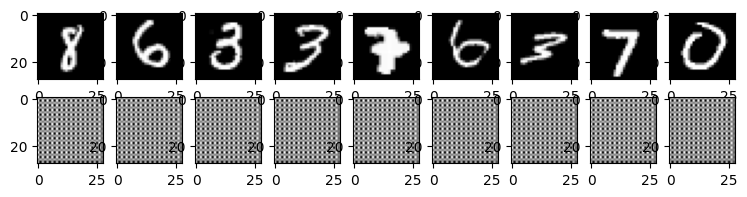

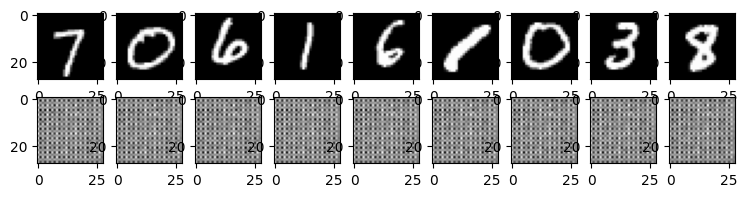

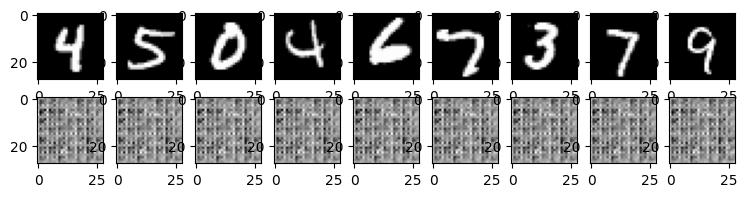

In [83]:
## Afficher les images 

for k in range(0, num_epochs, 4): 
    plt.figure(figsize=(9,2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon= outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs): 
        if i< 9 :
            plt.subplot(2, 9, i+1)
            item = item.reshape(-1, images.shape[2], images.shape[3])
            plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i < 9:
            plt.subplot(2, 9, 9+i+1)
            item = item.reshape(-1,images.shape[2], images.shape[3])
            plt.imshow(item[0])

In [75]:
#CNN encoder

class CNN_Autoencoder(nn.Module): 
    def __init__(self):
        #beginning size image = 784
        super(CNN_Autoencoder, self).__init__() 
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride = 2, padding = 1), # N, 16, 14, 14
            nn.ReLU(), 
            nn.Conv2d(16, 32, 3, stride = 2, padding = 1),# N, 32, 7, 7
            nn.ReLU(), 
            nn.Conv2d(32, 64, 7)# N, 64, 1, 1
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7), # N, 32, 7, 7
            nn.ReLU(), 
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding = 1, output_padding = 1), #N, 16, 14,14
            nn.ReLU(), 
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding = 1, output_padding = 1), #N, 1, 28, 28
            nn.Sigmoid()
        )
        pass
    
    def forward (self, x): 
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
# Note : [-1,1]  -> nn.Tanh
#nn.MaxPool2d -> nn.MaxUnpool2d()
        

In [76]:
model = CNN_Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay=1e-5)

In [77]:
num_epochs = 10
outputs    = []
for epoch in range(num_epochs): 
    for (img, _) in data_loader: 
        #reconstructed image 
        recon = model(img)
        loss  = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')
        outputs.append((epoch,img,recon))

Epoch:1,Loss:0.2473
Epoch:1,Loss:0.2465
Epoch:1,Loss:0.2466
Epoch:1,Loss:0.2450
Epoch:1,Loss:0.2434
Epoch:1,Loss:0.2423
Epoch:1,Loss:0.2384
Epoch:1,Loss:0.2367
Epoch:1,Loss:0.2337
Epoch:1,Loss:0.2271
Epoch:1,Loss:0.2199
Epoch:1,Loss:0.2101
Epoch:1,Loss:0.1999
Epoch:1,Loss:0.1872
Epoch:1,Loss:0.1747
Epoch:1,Loss:0.1614
Epoch:1,Loss:0.1520
Epoch:1,Loss:0.1396
Epoch:1,Loss:0.1334
Epoch:1,Loss:0.1254
Epoch:1,Loss:0.1140
Epoch:1,Loss:0.1132
Epoch:1,Loss:0.1010
Epoch:1,Loss:0.0956
Epoch:1,Loss:0.0891
Epoch:1,Loss:0.0956
Epoch:1,Loss:0.0856
Epoch:1,Loss:0.0819
Epoch:1,Loss:0.0814
Epoch:1,Loss:0.0906
Epoch:1,Loss:0.0801
Epoch:1,Loss:0.0763
Epoch:1,Loss:0.0822
Epoch:1,Loss:0.0715
Epoch:1,Loss:0.0758
Epoch:1,Loss:0.0761
Epoch:1,Loss:0.0778
Epoch:1,Loss:0.0712
Epoch:1,Loss:0.0728
Epoch:1,Loss:0.0723
Epoch:1,Loss:0.0733
Epoch:1,Loss:0.0729
Epoch:1,Loss:0.0700
Epoch:1,Loss:0.0709
Epoch:1,Loss:0.0718
Epoch:1,Loss:0.0780
Epoch:1,Loss:0.0726
Epoch:1,Loss:0.0682
Epoch:1,Loss:0.0701
Epoch:1,Loss:0.0713


Epoch:1,Loss:0.0254
Epoch:1,Loss:0.0244
Epoch:1,Loss:0.0248
Epoch:1,Loss:0.0257
Epoch:1,Loss:0.0244
Epoch:1,Loss:0.0257
Epoch:1,Loss:0.0253
Epoch:1,Loss:0.0245
Epoch:1,Loss:0.0228
Epoch:1,Loss:0.0237
Epoch:1,Loss:0.0274
Epoch:1,Loss:0.0264
Epoch:1,Loss:0.0267
Epoch:1,Loss:0.0228
Epoch:1,Loss:0.0241
Epoch:1,Loss:0.0246
Epoch:1,Loss:0.0248
Epoch:1,Loss:0.0244
Epoch:1,Loss:0.0261
Epoch:1,Loss:0.0233
Epoch:1,Loss:0.0258
Epoch:1,Loss:0.0238
Epoch:1,Loss:0.0255
Epoch:1,Loss:0.0242
Epoch:1,Loss:0.0216
Epoch:1,Loss:0.0214
Epoch:1,Loss:0.0229
Epoch:1,Loss:0.0223
Epoch:1,Loss:0.0251
Epoch:1,Loss:0.0233
Epoch:1,Loss:0.0218
Epoch:1,Loss:0.0204
Epoch:1,Loss:0.0229
Epoch:1,Loss:0.0209
Epoch:1,Loss:0.0233
Epoch:1,Loss:0.0223
Epoch:1,Loss:0.0225
Epoch:1,Loss:0.0228
Epoch:1,Loss:0.0215
Epoch:1,Loss:0.0235
Epoch:1,Loss:0.0243
Epoch:1,Loss:0.0214
Epoch:1,Loss:0.0224
Epoch:1,Loss:0.0208
Epoch:1,Loss:0.0210
Epoch:1,Loss:0.0201
Epoch:1,Loss:0.0221
Epoch:1,Loss:0.0210
Epoch:1,Loss:0.0233
Epoch:1,Loss:0.0216


Epoch:1,Loss:0.0116
Epoch:1,Loss:0.0108
Epoch:1,Loss:0.0097
Epoch:1,Loss:0.0110
Epoch:1,Loss:0.0100
Epoch:1,Loss:0.0107
Epoch:1,Loss:0.0107
Epoch:1,Loss:0.0101
Epoch:1,Loss:0.0103
Epoch:1,Loss:0.0107
Epoch:1,Loss:0.0118
Epoch:1,Loss:0.0100
Epoch:1,Loss:0.0109
Epoch:1,Loss:0.0114
Epoch:1,Loss:0.0105
Epoch:1,Loss:0.0101
Epoch:1,Loss:0.0103
Epoch:1,Loss:0.0094
Epoch:1,Loss:0.0099
Epoch:1,Loss:0.0115
Epoch:1,Loss:0.0107
Epoch:1,Loss:0.0100
Epoch:1,Loss:0.0103
Epoch:1,Loss:0.0101
Epoch:1,Loss:0.0090
Epoch:1,Loss:0.0118
Epoch:1,Loss:0.0102
Epoch:1,Loss:0.0106
Epoch:1,Loss:0.0105
Epoch:1,Loss:0.0100
Epoch:1,Loss:0.0111
Epoch:1,Loss:0.0107
Epoch:1,Loss:0.0097
Epoch:1,Loss:0.0112
Epoch:1,Loss:0.0091
Epoch:1,Loss:0.0107
Epoch:1,Loss:0.0109
Epoch:1,Loss:0.0102
Epoch:1,Loss:0.0095
Epoch:1,Loss:0.0098
Epoch:1,Loss:0.0105
Epoch:1,Loss:0.0103
Epoch:1,Loss:0.0095
Epoch:1,Loss:0.0110
Epoch:1,Loss:0.0113
Epoch:1,Loss:0.0099
Epoch:1,Loss:0.0105
Epoch:1,Loss:0.0105
Epoch:1,Loss:0.0104
Epoch:1,Loss:0.0101


Epoch:2,Loss:0.0081
Epoch:2,Loss:0.0076
Epoch:2,Loss:0.0074
Epoch:2,Loss:0.0073
Epoch:2,Loss:0.0069
Epoch:2,Loss:0.0071
Epoch:2,Loss:0.0074
Epoch:2,Loss:0.0065
Epoch:2,Loss:0.0060
Epoch:2,Loss:0.0076
Epoch:2,Loss:0.0071
Epoch:2,Loss:0.0071
Epoch:2,Loss:0.0069
Epoch:2,Loss:0.0075
Epoch:2,Loss:0.0064
Epoch:2,Loss:0.0078
Epoch:2,Loss:0.0074
Epoch:2,Loss:0.0070
Epoch:2,Loss:0.0075
Epoch:2,Loss:0.0081
Epoch:2,Loss:0.0067
Epoch:2,Loss:0.0067
Epoch:2,Loss:0.0070
Epoch:2,Loss:0.0067
Epoch:2,Loss:0.0079
Epoch:2,Loss:0.0075
Epoch:2,Loss:0.0072
Epoch:2,Loss:0.0073
Epoch:2,Loss:0.0075
Epoch:2,Loss:0.0065
Epoch:2,Loss:0.0072
Epoch:2,Loss:0.0067
Epoch:2,Loss:0.0070
Epoch:2,Loss:0.0078
Epoch:2,Loss:0.0060
Epoch:2,Loss:0.0067
Epoch:2,Loss:0.0071
Epoch:2,Loss:0.0067
Epoch:2,Loss:0.0081
Epoch:2,Loss:0.0081
Epoch:2,Loss:0.0072
Epoch:2,Loss:0.0071
Epoch:2,Loss:0.0068
Epoch:2,Loss:0.0082
Epoch:2,Loss:0.0067
Epoch:2,Loss:0.0065
Epoch:2,Loss:0.0069
Epoch:2,Loss:0.0077
Epoch:2,Loss:0.0068
Epoch:2,Loss:0.0070


Epoch:2,Loss:0.0059
Epoch:2,Loss:0.0064
Epoch:2,Loss:0.0060
Epoch:2,Loss:0.0062
Epoch:2,Loss:0.0058
Epoch:2,Loss:0.0066
Epoch:2,Loss:0.0057
Epoch:2,Loss:0.0062
Epoch:2,Loss:0.0063
Epoch:2,Loss:0.0057
Epoch:2,Loss:0.0056
Epoch:2,Loss:0.0057
Epoch:2,Loss:0.0057
Epoch:2,Loss:0.0061
Epoch:2,Loss:0.0054
Epoch:2,Loss:0.0061
Epoch:2,Loss:0.0064
Epoch:2,Loss:0.0070
Epoch:2,Loss:0.0067
Epoch:2,Loss:0.0064
Epoch:2,Loss:0.0067
Epoch:2,Loss:0.0054
Epoch:2,Loss:0.0062
Epoch:2,Loss:0.0064
Epoch:2,Loss:0.0061
Epoch:2,Loss:0.0061
Epoch:2,Loss:0.0068
Epoch:2,Loss:0.0061
Epoch:2,Loss:0.0059
Epoch:2,Loss:0.0053
Epoch:2,Loss:0.0055
Epoch:2,Loss:0.0059
Epoch:2,Loss:0.0052
Epoch:2,Loss:0.0066
Epoch:2,Loss:0.0061
Epoch:2,Loss:0.0060
Epoch:2,Loss:0.0056
Epoch:2,Loss:0.0056
Epoch:2,Loss:0.0059
Epoch:2,Loss:0.0056
Epoch:2,Loss:0.0051
Epoch:2,Loss:0.0058
Epoch:2,Loss:0.0055
Epoch:2,Loss:0.0062
Epoch:2,Loss:0.0065
Epoch:2,Loss:0.0057
Epoch:2,Loss:0.0057
Epoch:2,Loss:0.0065
Epoch:2,Loss:0.0059
Epoch:2,Loss:0.0062


Epoch:3,Loss:0.0050
Epoch:3,Loss:0.0051
Epoch:3,Loss:0.0054
Epoch:3,Loss:0.0056
Epoch:3,Loss:0.0046
Epoch:3,Loss:0.0046
Epoch:3,Loss:0.0053
Epoch:3,Loss:0.0056
Epoch:3,Loss:0.0046
Epoch:3,Loss:0.0053
Epoch:3,Loss:0.0049
Epoch:3,Loss:0.0053
Epoch:3,Loss:0.0051
Epoch:3,Loss:0.0054
Epoch:3,Loss:0.0049
Epoch:3,Loss:0.0047
Epoch:3,Loss:0.0051
Epoch:3,Loss:0.0045
Epoch:3,Loss:0.0053
Epoch:3,Loss:0.0045
Epoch:3,Loss:0.0050
Epoch:3,Loss:0.0048
Epoch:3,Loss:0.0052
Epoch:3,Loss:0.0046
Epoch:3,Loss:0.0050
Epoch:3,Loss:0.0043
Epoch:3,Loss:0.0052
Epoch:3,Loss:0.0046
Epoch:3,Loss:0.0049
Epoch:3,Loss:0.0054
Epoch:3,Loss:0.0044
Epoch:3,Loss:0.0054
Epoch:3,Loss:0.0041
Epoch:3,Loss:0.0054
Epoch:3,Loss:0.0054
Epoch:3,Loss:0.0049
Epoch:3,Loss:0.0041
Epoch:3,Loss:0.0048
Epoch:3,Loss:0.0056
Epoch:3,Loss:0.0053
Epoch:3,Loss:0.0052
Epoch:3,Loss:0.0050
Epoch:3,Loss:0.0050
Epoch:3,Loss:0.0048
Epoch:3,Loss:0.0041
Epoch:3,Loss:0.0058
Epoch:3,Loss:0.0052
Epoch:3,Loss:0.0054
Epoch:3,Loss:0.0051
Epoch:3,Loss:0.0046


Epoch:3,Loss:0.0039
Epoch:3,Loss:0.0049
Epoch:3,Loss:0.0045
Epoch:3,Loss:0.0043
Epoch:3,Loss:0.0038
Epoch:3,Loss:0.0047
Epoch:3,Loss:0.0042
Epoch:3,Loss:0.0050
Epoch:3,Loss:0.0043
Epoch:3,Loss:0.0050
Epoch:3,Loss:0.0046
Epoch:3,Loss:0.0047
Epoch:3,Loss:0.0041
Epoch:3,Loss:0.0048
Epoch:3,Loss:0.0046
Epoch:3,Loss:0.0044
Epoch:3,Loss:0.0046
Epoch:3,Loss:0.0045
Epoch:3,Loss:0.0049
Epoch:3,Loss:0.0047
Epoch:3,Loss:0.0044
Epoch:3,Loss:0.0050
Epoch:3,Loss:0.0043
Epoch:3,Loss:0.0042
Epoch:3,Loss:0.0046
Epoch:3,Loss:0.0037
Epoch:3,Loss:0.0044
Epoch:3,Loss:0.0047
Epoch:3,Loss:0.0041
Epoch:3,Loss:0.0041
Epoch:3,Loss:0.0052
Epoch:3,Loss:0.0043
Epoch:3,Loss:0.0044
Epoch:3,Loss:0.0049
Epoch:3,Loss:0.0044
Epoch:3,Loss:0.0045
Epoch:3,Loss:0.0049
Epoch:3,Loss:0.0044
Epoch:3,Loss:0.0042
Epoch:3,Loss:0.0043
Epoch:3,Loss:0.0038
Epoch:3,Loss:0.0040
Epoch:3,Loss:0.0041
Epoch:3,Loss:0.0046
Epoch:3,Loss:0.0046
Epoch:3,Loss:0.0042
Epoch:3,Loss:0.0046
Epoch:3,Loss:0.0040
Epoch:3,Loss:0.0042
Epoch:3,Loss:0.0045


Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0034
Epoch:4,Loss:0.0037
Epoch:4,Loss:0.0042
Epoch:4,Loss:0.0034
Epoch:4,Loss:0.0041
Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0044
Epoch:4,Loss:0.0043
Epoch:4,Loss:0.0043
Epoch:4,Loss:0.0049
Epoch:4,Loss:0.0042
Epoch:4,Loss:0.0039
Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0042
Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0035
Epoch:4,Loss:0.0042
Epoch:4,Loss:0.0035
Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0046
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0039
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0043
Epoch:4,Loss:0.0048
Epoch:4,Loss:0.0043
Epoch:4,Loss:0.0030
Epoch:4,Loss:0.0041
Epoch:4,Loss:0.0039
Epoch:4,Loss:0.0037
Epoch:4,Loss:0.0042
Epoch:4,Loss:0.0041
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0037
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0042
Epoch:4,Loss:0.0041
Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0039
Epoch:4,Loss:0.0039
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0043
Epoch:4,Loss:0.0039
Epoch:4,Loss:0.0042
Epoch:4,Loss:0.0039


Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0037
Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0039
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0042
Epoch:4,Loss:0.0037
Epoch:4,Loss:0.0042
Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0037
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0041
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0043
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0039
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0037
Epoch:4,Loss:0.0039
Epoch:4,Loss:0.0043
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0042
Epoch:4,Loss:0.0039
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0041
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0037
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0043
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0035
Epoch:4,Loss:0.0037
Epoch:4,Loss:0.0040
Epoch:4,Loss:0.0038
Epoch:4,Loss:0.0041
Epoch:4,Loss:0.0038


Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0035
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0037
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0032
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0035
Epoch:4,Loss:0.0037
Epoch:4,Loss:0.0034
Epoch:4,Loss:0.0032
Epoch:4,Loss:0.0036
Epoch:4,Loss:0.0037
Epoch:4,Loss:0.0037
Epoch:4,Loss:0.0035
Epoch:4,Loss:0.0034
Epoch:5,Loss:0.0038
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0037
Epoch:5,Loss:0.0036
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0034
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0038
Epoch:5,Loss:0.0037
Epoch:5,Loss:0.0042
Epoch:5,Loss:0.0034
Epoch:5,Loss:0.0038
Epoch:5,Loss:0.0036
Epoch:5,Loss:0.0038
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0040
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0036
Epoch:5,Loss:0.0038
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0037
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0036
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0036
Epoch:5,Loss:0.0030
Epoch:5,Loss:0.0032


Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0037
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0030
Epoch:5,Loss:0.0030
Epoch:5,Loss:0.0034
Epoch:5,Loss:0.0031
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0030
Epoch:5,Loss:0.0038
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0037
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0034
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0034
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0030
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0030
Epoch:5,Loss:0.0029
Epoch:5,Loss:0.0029
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0031
Epoch:5,Loss:0.0034
Epoch:5,Loss:0.0030
Epoch:5,Loss:0.0037
Epoch:5,Loss:0.0034
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0031
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0031
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0031
Epoch:5,Loss:0.0030
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0035


Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0031
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0031
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0037
Epoch:5,Loss:0.0034
Epoch:5,Loss:0.0036
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0034
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0037
Epoch:5,Loss:0.0031
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0031
Epoch:5,Loss:0.0036
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0031
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0037
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0031
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0036
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0030
Epoch:5,Loss:0.0031
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0029
Epoch:5,Loss:0.0038
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0034
Epoch:5,Loss:0.0029
Epoch:5,Loss:0.0034
Epoch:5,Loss:0.0029
Epoch:5,Loss:0.0035
Epoch:5,Loss:0.0032
Epoch:5,Loss:0.0030
Epoch:5,Loss:0.0033
Epoch:5,Loss:0.0029
Epoch:5,Loss:0.0033


Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0029
Epoch:6,Loss:0.0029
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0029
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0028
Epoch:6,Loss:0.0033
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0029
Epoch:6,Loss:0.0027
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0034
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0034
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0034
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0028
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0033
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0029
Epoch:6,Loss:0.0035
Epoch:6,Loss:0.0035
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0038
Epoch:6,Loss:0.0029
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0029
Epoch:6,Loss:0.0034
Epoch:6,Loss:0.0028


Epoch:6,Loss:0.0033
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0034
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0026
Epoch:6,Loss:0.0033
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0034
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0037
Epoch:6,Loss:0.0028
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0029
Epoch:6,Loss:0.0027
Epoch:6,Loss:0.0028
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0029
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0026
Epoch:6,Loss:0.0029
Epoch:6,Loss:0.0033
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0034
Epoch:6,Loss:0.0035
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0029
Epoch:6,Loss:0.0033
Epoch:6,Loss:0.0030
Epoch:6,Loss:0.0034
Epoch:6,Loss:0.0035
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0029
Epoch:6,Loss:0.0032
Epoch:6,Loss:0.0027
Epoch:6,Loss:0.0031
Epoch:6,Loss:0.0028
Epoch:6,Loss:0.0033
Epoch:6,Loss:0.0033
Epoch:6,Loss:0.0034
Epoch:6,Loss:0.0032


Epoch:7,Loss:0.0032
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0027
Epoch:7,Loss:0.0034
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0027
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0027
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0032
Epoch:7,Loss:0.0027
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0034
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0027
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0026
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0026
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0032
Epoch:7,Loss:0.0032
Epoch:7,Loss:0.0033
Epoch:7,Loss:0.0032
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0032


Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0032
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0032
Epoch:7,Loss:0.0026
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0027
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0026
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0027
Epoch:7,Loss:0.0034
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0033
Epoch:7,Loss:0.0032
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0027
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0032
Epoch:7,Loss:0.0027
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0033
Epoch:7,Loss:0.0026
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0030
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0031
Epoch:7,Loss:0.0029
Epoch:7,Loss:0.0028
Epoch:7,Loss:0.0031


Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0033
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0036
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0026
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0026
Epoch:8,Loss:0.0027


Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0024
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0026
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0033
Epoch:8,Loss:0.0035
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0034
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0033
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0034
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0027


Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0033
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0028
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0033
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0033
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0032
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0025
Epoch:8,Loss:0.0033
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0027
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0029
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0033
Epoch:8,Loss:0.0030
Epoch:8,Loss:0.0031
Epoch:8,Loss:0.0026
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0036
Epoch:9,Loss:0.0027


Epoch:9,Loss:0.0026
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0030
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0033
Epoch:9,Loss:0.0026
Epoch:9,Loss:0.0026
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0025
Epoch:9,Loss:0.0033
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0033
Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0032
Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0026
Epoch:9,Loss:0.0025
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0026
Epoch:9,Loss:0.0030
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0030
Epoch:9,Loss:0.0026
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0028


Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0030
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0030
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0026
Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0032
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0030
Epoch:9,Loss:0.0030
Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0032
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0026
Epoch:9,Loss:0.0026
Epoch:9,Loss:0.0026
Epoch:9,Loss:0.0026
Epoch:9,Loss:0.0033
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0030
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0030
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0028
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0030
Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0027
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0025
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0030
Epoch:9,Loss:0.0031
Epoch:9,Loss:0.0025
Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0030
Epoch:9,Loss:0.0029
Epoch:9,Loss:0.0027


Epoch:10,Loss:0.0034
Epoch:10,Loss:0.0026
Epoch:10,Loss:0.0026
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0031
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0034
Epoch:10,Loss:0.0029
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0025
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0026
Epoch:10,Loss:0.0033
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0032
Epoch:10,Loss:0.0025
Epoch:10,Loss:0.0029
Epoch:10,Loss:0.0029
Epoch:10,Loss:0.0029
Epoch:10,Loss:0.0026
Epoch:10,Loss:0.0029
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0026
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0029
Epoch:10,Loss:0.0029
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0025
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0025
Epoch:10,Loss:0.0029
Epoch:10,Loss

Epoch:10,Loss:0.0029
Epoch:10,Loss:0.0026
Epoch:10,Loss:0.0026
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0026
Epoch:10,Loss:0.0032
Epoch:10,Loss:0.0025
Epoch:10,Loss:0.0026
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0029
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0029
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0026
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0025
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0029
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0025
Epoch:10,Loss:0.0026
Epoch:10,Loss:0.0029
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0032
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0028
Epoch:10,Loss:0.0026
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0033
Epoch:10,Loss:0.0029
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0027
Epoch:10,Loss:0.0031
Epoch:10,Loss:0.0030
Epoch:10,Loss:0.0031
Epoch:10,Loss:0.0030
Epoch:10,Loss